In [1]:
#Imports
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
import matplotlib.backends.backend_pdf
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['lines.markersize'] = 1
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['axes.labelsize'] = 6
matplotlib.rcParams['axes.labelpad'] = 0
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['xtick.major.size'] = 2
matplotlib.rcParams['xtick.major.width'] = 0.3
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['ytick.major.size'] = 2
matplotlib.rcParams['ytick.major.width'] = 0.3
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import gaussian_kde
from pathlib import Path


C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\011222_N2_L1_Swim_0008_W1.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\011222_N2_L1_Swim_0010_W1.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\032522_N2_L1_Swim_0014.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\032522_N2_L1_Swim_0015.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\062722_N2_L1_Swim0001worm1.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\062722_N2_L1_Swim0001worm2.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\062722_N2_L1_Swim0003.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\062722_N2_L1_Swim0004.txt has missing rows
C:\Users\Scott\Documents\python\wopodyn\data\raw\swimming\N2_L1\062722_N2_L1_Swim0005worm1.txt has missing rows
C:\Users\Sco

meta NOT subset; don't know how to subset; dropped


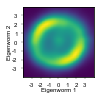

In [16]:
# 
#compile data from all files in directory
raw_dir = Path('C:/Users/Scott/Documents/python/wopodyn/data/raw/swimming')
suffix = 'N2_L1'
path = raw_dir / suffix
angles = []
filenames = []
for count, file in enumerate(path.glob('*.txt')):
    try:
        # Data Pre-processing/cleaning step to remove header of multiple lines (at times)
        with open(file) as curr_file:
            lines = curr_file.readlines()
            lines = [line.rstrip() for line in lines]
        ind = 0
        for i in range(len(lines)):
            if lines[i][:4] == 'Time':
                ind = i
                break
        # Actually loading the data from .txt
        angle = np.loadtxt(file, dtype='float', skiprows=ind+1)
        # A check to make sure that the data is 10 dimensional
        if len(angle[0]) < 11:
            angles.append(angle)
            print(f'{file} missing time')
        else:
            angles.append(angle[:, 1:])  # slice out time column
        filenames.append(file)
    except UnicodeDecodeError:
        print(f'{file} has unknown character')
    except ValueError as e:
        print(f'{file} has missing rows')
# for count, file in enumerate(path.glob('*')):
#     filenames.append(file)
#     angle = np.loadtxt(file, dtype= 'float', skiprows=1)
#     angles.append(angle[:,1:]) #slice out time column
# print(f'{count+1} files in directory for {suffix}')
# %%
#scale and perform pca on data
stds = []
for angle in angles:
  scaler = StandardScaler() #initialize a standarizing object
  stds.append(scaler.fit_transform(angle)) #normalize the data
stds = np.vstack(stds) #stack to (n_frames, n_segments) for all data

pca = PCA(n_components=10) #init pca object
pcs = pca.fit_transform(stds) #fit and transform the angles data
# %%
kde = gaussian_kde(pcs[:,0:2].T)
xmin = np.min(pcs[:,0])
xmax = np.max(pcs[:,0])
ymin = np.min(pcs[:,1])
ymax = np.max(pcs[:,1])

gmin = np.min([xmin, ymin]) # left bottom min
gmax = np.max([xmax, ymax]) # right top min

fmin = np.min([abs(gmin), abs(gmax)]) # min for lim

X, Y = np.mgrid[gmin:gmax:100j, gmin:gmax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

fig, ax = plt.subplots(figsize=(1.3,1.3))
im1 = ax.imshow(np.rot90(Z), cmap='viridis',
          extent=[gmin, gmax, gmin, gmax])
ax.set(xlim = [-4, 4], 
        xticks = np.arange(-3, 4),
        ylim = [-4, 4], 
        yticks = np.arange(-3, 4),
        xlabel = 'Eigenworm 1', 
        ylabel = 'Eigenworm 2')
# fig.colorbar(im1, ax=ax)
figname = Path('C:/Users/Scott/Documents/python/wopodyn/reports/figures/N2l1histo.pdf')
fig.savefig(figname, dpi=300, transparent=True, bbox_inches="tight")

In [3]:
os.getcwd()

'C:\\Users\\Scott\\Documents\\python\\wopodyn\\scripts'